In [1]:
import pandas as pd
pd.options.display.max_columns = 100
pd.options.display.max_rows = 100

import numpy as np

import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
%matplotlib inline

In [2]:
data = pd.read_csv('train.csv', header=0)

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [5]:
data['Age'].fillna(data['Age'].dropna().median(), inplace=True)

In [6]:
data.Embarked[data.Embarked.isnull()] = data.Embarked.dropna().mode().values

C:\Users\Director UYE\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       891 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [8]:
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


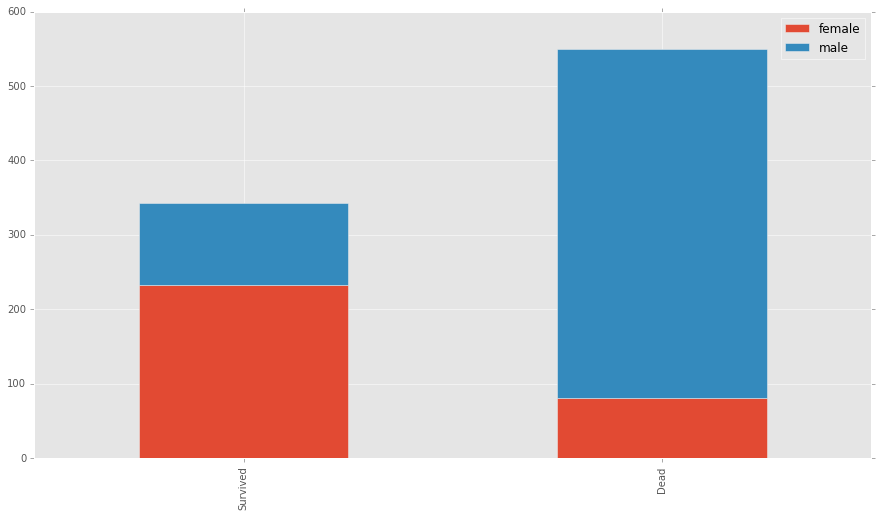

In [9]:
Survived_sex  = data[data.Survived==1]['Sex'].value_counts()
Dead_sex = data[data.Survived==0]['Sex'].value_counts()
df = pd.DataFrame([Survived_sex, Dead_sex])
df.index = ['Survived','Dead']
df.plot(kind='bar', stacked=True, figsize=(15,8))

In [10]:
df.head()

,female,male
Survived,233,109
Dead,81,468


In [10]:
import seaborn as sns

(0, 0.12)

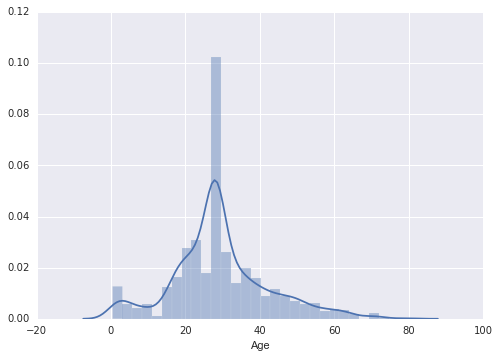

In [11]:
sns.distplot(data['Age'], bins=30)
sns.plt.ylim(0,)

In [12]:
def status(feature):
    
    print 'processing', feature, ' :ok'

In [13]:
def get_combined_data():
    
    train = pd.read_csv('train.csv')
    test = pd.read_csv('test.csv')

    targets = train['Survived']
    train.drop('Survived', 1, inplace=True)

    combined = train.append(test)
    combined.reset_index(inplace=True)
    combined.drop(['index'],inplace=True,axis=1)
    
    return combined

In [14]:
combined = get_combined_data()

In [15]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1046 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1308 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 112.6+ KB


In [16]:
def get_title():
    
    global combined
    
    combined['Title'] = combined.Name.map(lambda name: name.split(',')[1].split('.')[0].strip())
    
    title_dictionary = {
                        'Mr' :           'Mr',
                        'Miss' :         'Miss',            
                        'Mrs' :          'Mrs',
                        'Master' :       'Master',
                        'Rev' :          'Officer',              
                        'Dr' :           'Officer',  
                        'Col' :          'Officer',   
                        'Major' :        'Officer',
                        'Mlle' :         'Miss',
                        'Ms' :           'Mrs',    
                        'Mme':           'Mrs',      
                        'the Countess' : 'Royalty',      
                        'Don' :          'Royalty',
                        'Lady':          'Royalty',    
                        'Sir' :          'Royalty',
                        'Jonkheer' :     'Royalty',      
                        'Dona' :         'Royalty',
                        'Capt' :         'Officer'  
                       }
    
    combined['Title'] = combined.Title.map(title_dictionary)
    
    

In [17]:
get_title()

In [18]:
combined.drop('Name',axis=1,inplace=True)

In [19]:
combined.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,3,male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [22]:
combined.groupby(['Sex','Pclass','Title']).median()

PassengerId   Age  SibSp  Parch      Fare
Sex    Pclass Title                                             
female 1      Miss           529.5  30.0    0.0    0.0   99.9625
              Mrs            853.5  45.0    1.0    0.0   78.1125
              Officer        797.0  49.0    0.0    0.0   25.9292
              Royalty        760.0  39.0    0.0    0.0   86.5000
       2      Miss           606.5  20.0    0.0    0.0   20.2500
              Mrs            533.0  30.0    1.0    0.0   26.0000
       3      Miss           603.5  18.0    0.0    0.0    8.0500
              Mrs            668.5  31.0    1.0    1.0   15.5000
male   1      Master         803.0   6.0    1.0    2.0  134.5000
              Mr             634.0  41.5    0.0    0.0   47.1000
              Officer        678.0  52.0    0.0    0.0   37.5500
              Royalty        600.0  40.0    0.0    0.0   27.7208
       2      Master         550.0   2.0    1.0    1.0   26.0000
              Mr             723.5  30.0    0.0    0.0   13.0000
              Officer        513.0  41.5    0.0    0.0   13.0000
       3      Master         789.0   6.0    3.0    1.0   22.3583
              Mr             640.5  26.0    0.0    0.0    7.8958

In [23]:
combined.Age = combined.groupby(['Sex','Pclass','Title'])['Age'].transform(lambda x: x.fillna(x.median()))

In [25]:
combined.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,3,male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [28]:
combined.Embarked[combined.Embarked.isnull()] = combined.Embarked.dropna().mode().values

C:\Users\Director UYE\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [29]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
Age            1309 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1308 non-null float64
Cabin          295 non-null object
Embarked       1309 non-null object
Title          1309 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 112.6+ KB


In [34]:
combined.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,3,1,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,0,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,3,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,0,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,3,1,35.0,0,0,373450,8.0500,NaN,S,Mr


In [33]:
combined['Sex'] = combined['Sex'].map({'male':1,'female':0})

In [35]:
def process_name():
    
    global combined
    
    titles_dummies = pd.get_dummies(combined['Title'], prefix='Title')
    combined = pd.concat([combined, titles_dummies], axis=1)
    
    combined.drop('Title', axis=1, inplace=True)

In [37]:
process_name()

In [38]:
combined.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty
0,1,3,1,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0,0.0,1.0,0.0,0.0,0.0
1,2,1,0,38.0,1,0,PC 17599,71.2833,C85,C,0.0,0.0,0.0,1.0,0.0,0.0
2,3,3,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0.0,1.0,0.0,0.0,0.0,0.0
3,4,1,0,35.0,1,0,113803,53.1000,C123,S,0.0,0.0,0.0,1.0,0.0,0.0
4,5,3,1,35.0,0,0,373450,8.0500,NaN,S,0.0,0.0,1.0,0.0,0.0,0.0


In [41]:
def process_embarked():
    
    global combined
    
    embarked_dummies = pd.get_dummies(combined['Embarked'], prefix='Embark')
    combined = pd.concat([combined, embarked_dummies], axis=1)
    
    combined.drop('Embarked', axis=1, inplace=True)

In [42]:
process_embarked()

In [43]:
combined.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty,Embark_C,Embark_Q,Embark_S
0,1,3,1,22.0,1,0,A/5 21171,7.2500,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2,1,0,38.0,1,0,PC 17599,71.2833,C85,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,3,3,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,4,1,0,35.0,1,0,113803,53.1000,C123,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,5,3,1,35.0,0,0,373450,8.0500,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [45]:
combined.Cabin.fillna('U', inplace=True)

In [47]:
combined.Cabin = combined.Cabin.map(lambda x: x[0])

In [48]:
combined.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty,Embark_C,Embark_Q,Embark_S
0,1,3,1,22.0,1,0,A/5 21171,7.2500,U,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2,1,0,38.0,1,0,PC 17599,71.2833,C,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,3,3,0,26.0,0,0,STON/O2. 3101282,7.9250,U,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,4,1,0,35.0,1,0,113803,53.1000,C,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,5,3,1,35.0,0,0,373450,8.0500,U,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [49]:
cabin_dummies = pd.get_dummies(combined.Cabin, prefix='Cabin')

In [50]:
combined = pd.concat([combined, cabin_dummies], axis=1)

In [51]:
combined.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty,Embark_C,Embark_Q,Embark_S,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U
0,1,3,1,22.0,1,0,A/5 21171,7.2500,U,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2,1,0,38.0,1,0,PC 17599,71.2833,C,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,3,0,26.0,0,0,STON/O2. 3101282,7.9250,U,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,4,1,0,35.0,1,0,113803,53.1000,C,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,3,1,35.0,0,0,373450,8.0500,U,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [52]:
pclass_dummies = pd.get_dummies(combined.Pclass, prefix='Pclass')
combined = pd.concat([combined, pclass_dummies], axis=1)
combined.drop(['Cabin','Pclass'], axis=1, inplace=True)

In [53]:
combined.head()

,PassengerId,Sex,Age,SibSp,Parch,Ticket,Fare,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty,Embark_C,Embark_Q,Embark_S,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U,Pclass_1,Pclass_2,Pclass_3
0,1,1,22.0,1,0,A/5 21171,7.2500,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,2,0,38.0,1,0,PC 17599,71.2833,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,3,0,26.0,0,0,STON/O2. 3101282,7.9250,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,4,0,35.0,1,0,113803,53.1000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,5,1,35.0,0,0,373450,8.0500,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [54]:
def get_ticket():
    
    global combined
    
    def cleanTicket(ticket):
        
        ticket = ticket.replace('.','')
        ticket = ticket.replace('/','')
        ticket = ticket.split()
        ticket = map(lambda t: t.strip(), ticket)
        ticket = filter(lambda t: not t.isdigit(), ticket)
        if len(ticket) > 0:
            return ticket[0]
        else:
            return 'XXX'
        
    combined['Ticket'] = combined['Ticket'].map(cleanTicket)
    tickets_dummies = pd.get_dummies(combined['Ticket'], prefix='Ticket')
    combined = pd.concat([combined, tickets_dummies],axis=1)
    combined.drop('Ticket',axis=1,inplace=True)

In [55]:
get_ticket()

In [56]:
combined.head()

,PassengerId,Sex,Age,SibSp,Parch,Fare,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty,Embark_C,Embark_Q,Embark_S,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U,Pclass_1,Pclass_2,Pclass_3,Ticket_A,Ticket_A4,Ticket_A5,Ticket_AQ3,Ticket_AQ4,Ticket_AS,Ticket_C,Ticket_CA,Ticket_CASOTON,Ticket_FC,Ticket_FCC,Ticket_Fa,Ticket_LINE,Ticket_LP,Ticket_PC,Ticket_PP,Ticket_PPP,Ticket_SC,Ticket_SCA3,Ticket_SCA4,Ticket_SCAH,Ticket_SCOW,Ticket_SCPARIS,Ticket_SCParis,Ticket_SOC,Ticket_SOP,Ticket_SOPP,Ticket_SOTONO2,Ticket_SOTONOQ,Ticket_SP,Ticket_STONO,Ticket_STONO2,Ticket_STONOQ,Ticket_SWPP,Ticket_WC,Ticket_WEP,Ticket_XXX
0,1,1,22.0,1,0,7.2500,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,0,38.0,1,0,71.2833,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,0,26.0,0,0,7.9250,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,4,0,35.0,1,0,53.1000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,5,1,35.0,0,0,8.0500,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [58]:
combined.shape

(1309, 64)

In [59]:
def process_family():
    
    global combined
    
    combined['FamilySize'] = combined.SibSp + combined.Parch + 1
    combined['Singleton'] = combined['FamilySize'].map(lambda f: 1 if f==1 else 0)
    combined['SmallFamily'] = combined['FamilySize'].map(lambda f: 1 if 2<=f<=4 else 0)
    combined['LargeFamily'] = combined['FamilySize'].map(lambda f: 1 if f>=5 else 0)

In [60]:
process_family()

In [61]:
combined.shape

(1309, 68)

In [62]:
features = list(combined.columns)

In [64]:
features.remove('PassengerId')

In [65]:
combined[features] = combined[features].apply(lambda x: x/x.max(), axis=0)

In [66]:
combined.head()

,PassengerId,Sex,Age,SibSp,Parch,Fare,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty,Embark_C,Embark_Q,Embark_S,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U,Pclass_1,Pclass_2,Pclass_3,Ticket_A,Ticket_A4,Ticket_A5,Ticket_AQ3,Ticket_AQ4,Ticket_AS,Ticket_C,Ticket_CA,Ticket_CASOTON,Ticket_FC,Ticket_FCC,Ticket_Fa,Ticket_LINE,Ticket_LP,Ticket_PC,Ticket_PP,Ticket_PPP,Ticket_SC,Ticket_SCA3,Ticket_SCA4,Ticket_SCAH,Ticket_SCOW,Ticket_SCPARIS,Ticket_SCParis,Ticket_SOC,Ticket_SOP,Ticket_SOPP,Ticket_SOTONO2,Ticket_SOTONOQ,Ticket_SP,Ticket_STONO,Ticket_STONO2,Ticket_STONOQ,Ticket_SWPP,Ticket_WC,Ticket_WEP,Ticket_XXX,FamilySize,Singleton,SmallFamily,LargeFamily
0,1,1.0,0.2750,0.125,0.0,0.014151,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.181818,0.0,1.0,0.0
1,2,0.0,0.4750,0.125,0.0,0.139136,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.181818,0.0,1.0,0.0
2,3,0.0,0.3250,0.000,0.0,0.015469,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.090909,1.0,0.0,0.0
3,4,0.0,0.4375,0.125,0.0,0.103644,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.181818,0.0,1.0,0.0
4,5,1.0,0.4375,0.000,0.0,0.015713,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.090909,1.0,0.0,0.0


In [67]:
combined[['Singleton','SmallFamily','LargeFamily']].describe()

,Singleton,SmallFamily,LargeFamily
count,1309.000000,1309.000000,1309.000000
mean,0.603514,0.333843,0.062643
std,0.489354,0.471765,0.242413
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000


In [68]:
combined.head()

,PassengerId,Sex,Age,SibSp,Parch,Fare,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty,Embark_C,Embark_Q,Embark_S,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U,Pclass_1,Pclass_2,Pclass_3,Ticket_A,Ticket_A4,Ticket_A5,Ticket_AQ3,Ticket_AQ4,Ticket_AS,Ticket_C,Ticket_CA,Ticket_CASOTON,Ticket_FC,Ticket_FCC,Ticket_Fa,Ticket_LINE,Ticket_LP,Ticket_PC,Ticket_PP,Ticket_PPP,Ticket_SC,Ticket_SCA3,Ticket_SCA4,Ticket_SCAH,Ticket_SCOW,Ticket_SCPARIS,Ticket_SCParis,Ticket_SOC,Ticket_SOP,Ticket_SOPP,Ticket_SOTONO2,Ticket_SOTONOQ,Ticket_SP,Ticket_STONO,Ticket_STONO2,Ticket_STONOQ,Ticket_SWPP,Ticket_WC,Ticket_WEP,Ticket_XXX,FamilySize,Singleton,SmallFamily,LargeFamily
0,1,1.0,0.2750,0.125,0.0,0.014151,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.181818,0.0,1.0,0.0
1,2,0.0,0.4750,0.125,0.0,0.139136,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.181818,0.0,1.0,0.0
2,3,0.0,0.3250,0.000,0.0,0.015469,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.090909,1.0,0.0,0.0
3,4,0.0,0.4375,0.125,0.0,0.103644,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.181818,0.0,1.0,0.0
4,5,1.0,0.4375,0.000,0.0,0.015713,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.090909,1.0,0.0,0.0


In [70]:
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.cross_validation import StratifiedKFold
from sklearn.grid_search import GridSearchCV
from sklearn.ensemble.gradient_boosting import GradientBoostingClassifier
from sklearn.cross_validation import cross_val_score

In [72]:
def compute_score(clf,X,y,scoring='accuracy'):
    xval = cross_val_score(clf, X, y, cv = 5, scoring=scoring)
    return np.mean(xval)

In [73]:
def recover_train_test_target():
    global combined
    
    train0 = pd.read_csv('train.csv', header=0)
    
    targets = train0.Survived
    train = combined.ix[0:890]
    test = combined.ix[891:]
    
    return train, test, targets

In [74]:
train, test, targets = recover_train_test_target()

In [75]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
clf = ExtraTreesClassifier(n_estimators=200)
clf = clf.fit(train, targets)

In [76]:
features = pd.DataFrame()

In [78]:
features['feature'] = train.columns
features['importance'] = clf.feature_importances_

In [79]:
features.sort(['importance'], ascending=False)

C:\Users\Director UYE\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,feature,importance
0,PassengerId,0.128472
8,Title_Mr,0.127842
2,Age,0.118010
5,Fare,0.111991
1,Sex,0.096238
7,Title_Miss,0.042113
26,Pclass_3,0.038772
9,Title_Mrs,0.031870
23,Cabin_U,0.027977
64,FamilySize,0.021593


In [80]:
model = SelectFromModel(clf, prefit=True)
train_new = model.transform(train)
train_new.shape

(891L, 15L)

In [84]:
#test_new = model.transform(test.astype(int))
#test_new.shape
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 68 columns):
PassengerId       1309 non-null int64
Sex               1309 non-null float64
Age               1309 non-null float64
SibSp             1309 non-null float64
Parch             1309 non-null float64
Fare              1308 non-null float64
Title_Master      1309 non-null float64
Title_Miss        1309 non-null float64
Title_Mr          1309 non-null float64
Title_Mrs         1309 non-null float64
Title_Officer     1309 non-null float64
Title_Royalty     1309 non-null float64
Embark_C          1309 non-null float64
Embark_Q          1309 non-null float64
Embark_S          1309 non-null float64
Cabin_A           1309 non-null float64
Cabin_B           1309 non-null float64
Cabin_C           1309 non-null float64
Cabin_D           1309 non-null float64
Cabin_E           1309 non-null float64
Cabin_F           1309 non-null float64
Cabin_G           1309 non-null float64
Cabin_T        